In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [2]:
import sys
print(sys.version)

3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:36:39) [GCC 12.3.0]


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/working/'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [4]:
import cv2
import os

# Directory where your images are located
input_directory = '/kaggle/input/osteoporosis-database/Osteoporosis Knee X-ray/osteopenia'
# Directory where you want to save the modified images
output_directory = '/kaggle/working/newinput'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Loop through the images in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith(".jpg"):  # Modify the file extension as needed
        # Load the image
        image_path = os.path.join(input_directory, filename)
        img = cv2.imread(image_path)

        # Zoom the image (resize)
        zoomed_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

        # Flip the image horizontally
        flipped_img = cv2.flip(zoomed_img, 1)

        # Save the modified image
        output_path = os.path.join(output_directory, filename)
        cv2.imwrite(output_path, flipped_img)

print("Images have been processed and saved to the output directory.")

Images have been processed and saved to the output directory.


In [5]:
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
#from keras.preprocessing.image import ImageDataGenerator
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

2024-05-01 11:24:56.297081: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 11:24:56.297200: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 11:24:56.432568: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/kaggle/input/osteoporosis/osteoporosis/normal'
aug_dir = '/kaggle/working/normal'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]
    
    return augmented_images

# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))
        
        # Perform augmentation
        augmented_images = augment_image(img)
        
        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")

Augmentation complete.


In [7]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/kaggle/input/osteoporosis/osteoporosis/osteoporosis'
aug_dir = '/kaggle/working/osteoporosis'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]
    
    return augmented_images

# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))
        
        # Perform augmentation
        augmented_images = augment_image(img)
        
        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")

Augmentation complete.


In [8]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/kaggle/input/digital-knee-xray/MedicalExpert-I/0Normal'
aug_dir = '/kaggle/working/normal'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]
    
    return augmented_images

# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))
        
        # Perform augmentation
        augmented_images = augment_image(img)
        
        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")

Augmentation complete.


In [9]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/kaggle/input/digital-knee-xray/MedicalExpert-II/0Normal'
aug_dir = '/kaggle/working/normal'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]
    
    return augmented_images

# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))
        
        # Perform augmentation
        augmented_images = augment_image(img)
        
        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            
            # Check if the filename already exists, if so, append a number to make it unique
            counter = 1
            while os.path.exists(os.path.join(aug_dir, new_filename)):
                new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + '_' + str(counter) + os.path.splitext(filename)[1]
                counter += 1
            
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")

Augmentation complete.


In [10]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/kaggle/input/digital-knee-xray/MedicalExpert-I/4Severe'
aug_dir = '/kaggle/working/osteoporosis'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]
    
    return augmented_images

# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))
        
        # Perform augmentation
        augmented_images = augment_image(img)
        
        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")

Augmentation complete.


In [11]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/kaggle/input/digital-knee-xray/MedicalExpert-II/4Severe'
aug_dir = '/kaggle/working/osteoporosis'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]
    
    return augmented_images

# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))
        
        # Perform augmentation
        augmented_images = augment_image(img)
        
        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            
            # Check if the filename already exists, if so, append a number to make it unique
            counter = 1
            while os.path.exists(os.path.join(aug_dir, new_filename)):
                new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + '_' + str(counter) + os.path.splitext(filename)[1]
                counter += 1
            
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")


Augmentation complete.


In [12]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/kaggle/input/osteoporosis-database/Osteoporosis Knee X-ray/osteoporosis'
aug_dir = '/kaggle/working/osteoporosis'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]
    
    return augmented_images

# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))
        
        # Perform augmentation
        augmented_images = augment_image(img)
        
        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            
            # Check if the filename already exists, if so, append a number to make it unique
            counter = 1
            while os.path.exists(os.path.join(aug_dir, new_filename)):
                new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + '_' + str(counter) + os.path.splitext(filename)[1]
                counter += 1
            
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")


Augmentation complete.


In [13]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/kaggle/input/osteoporosis-knee-dataset-preprocessed128x256/Osteoporosis Knee Dataset/Osteoporosis'
aug_dir = '/kaggle/working/osteoporosis'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]
    
    return augmented_images

# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))
        
        # Perform augmentation
        augmented_images = augment_image(img)
        
        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            
            # Check if the filename already exists, if so, append a number to make it unique
            counter = 1
            while os.path.exists(os.path.join(aug_dir, new_filename)):
                new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + '_' + str(counter) + os.path.splitext(filename)[1]
                counter += 1
            
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")


Augmentation complete.


In [14]:
import os
import pandas as pd

healthy_dirs = [
    r'/kaggle/input/osteoporosis-database/Osteoporosis Knee X-ray/normal',
    r'/kaggle/input/osteoporosis/osteoporosis/normal',
    r'/kaggle/working/normal'
]
osteopenia_dir = [ r'/kaggle/input/osteoporosis-database/Osteoporosis Knee X-ray/osteopenia',
                  r'/kaggle/working/newinput', r'/kaggle/working/newinput']

osteoporosis_dirs = [
    r'/kaggle/input/osteoporosis-database/Osteoporosis Knee X-ray/osteoporosis',
    r'/kaggle/input/osteoporosis-knee-xray-dataset/osteoporosis/osteoporosis',
    r'/kaggle/input/osteoporosis-knee-dataset-preprocessed128x256/Osteoporosis Knee Dataset/Osteoporosis',
    r'/kaggle/input/osteoporosis/osteoporosis/osteoporosis',
    r'/kaggle/working/osteoporosis'
]

filepaths = []
labels = []
dict_lists = [healthy_dirs,osteopenia_dir, osteoporosis_dirs]
class_labels = ['Healthy', 'Osteopenia','Osteoporosis']

for i, dir_list in enumerate(dict_lists):
    for j in dir_list:
        flist = os.listdir(j)
        for f in flist:
            fpath = os.path.join(j, f)
            filepaths.append(fpath)
            labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
knee_osteoporosis_data = pd.concat([Fseries, Lseries], axis=1)
knee_osteoporosis_df = pd.DataFrame(knee_osteoporosis_data)
print(knee_osteoporosis_df.head())
print(knee_osteoporosis_df["labels"].value_counts())

                                           filepaths   labels
0  /kaggle/input/osteoporosis-database/Osteoporos...  Healthy
1  /kaggle/input/osteoporosis-database/Osteoporos...  Healthy
2  /kaggle/input/osteoporosis-database/Osteoporos...  Healthy
3  /kaggle/input/osteoporosis-database/Osteoporos...  Healthy
4  /kaggle/input/osteoporosis-database/Osteoporos...  Healthy
labels
Healthy         7353
Osteoporosis    5888
Osteopenia       374
Name: count, dtype: int64


In [15]:
knee_osteoporosis_df.shape

(13615, 2)

In [16]:
train_images, test_images = train_test_split(knee_osteoporosis_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(knee_osteoporosis_df, test_size=0.2, random_state=42)

In [17]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(224,224),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=4,
                                      shuffle=False            #do not shuffle data
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(224,224),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=4,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(224,224),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=4,
                                    shuffle=False
                                   )

Found 10892 validated image filenames belonging to 3 classes.
Found 4085 validated image filenames belonging to 3 classes.
Found 2723 validated image filenames belonging to 3 classes.


In [18]:
def show_knee_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

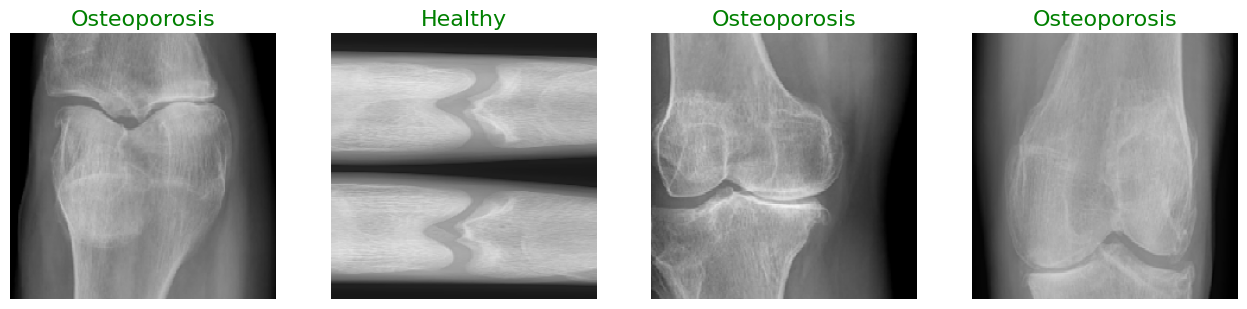

In [19]:
show_knee_images(train)

In [ ]:
from tensorflow.keras.applications import DenseNet201, EfficientNetB0
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the input shape (should match the target_size in your ImageDataGenerator, here 224x224x3)
input_shape = (224, 224, 3)
input_tensor = Input(shape=input_shape)

# -------------------------------
# Branch 1: DenseNet201 Feature Extractor
# -------------------------------
dense_net = DenseNet201(include_top=False, weights='imagenet', input_tensor=input_tensor)
x1 = GlobalAveragePooling2D()(dense_net.output)

# -------------------------------
# Branch 2: EfficientNetB0 Feature Extractor
# -------------------------------
efficient_net = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=input_tensor)
x2 = GlobalAveragePooling2D()(efficient_net.output)

# -------------------------------
# Concatenate features from both branches
# -------------------------------
combined_features = Concatenate()([x1, x2])

# -------------------------------
# Classification head
# -------------------------------
x = Dense(256, activation='relu')(combined_features)
x = Dropout(0.5)(x)
# We have three classes: 'Healthy', 'Osteopenia', and 'Osteoporosis'
output = Dense(3, activation='softmax')(x)

# Build the final hybrid model
hybrid_model = Model(inputs=input_tensor, outputs=output)

# Optionally, freeze the base models to train only the classification head first
for layer in dense_net.layers:
    layer.trainable = False
for layer in efficient_net.layers:
    layer.trainable = False

# Compile the model
hybrid_model.compile(optimizer=Adam(learning_rate=1e-4),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Display the model architecture
hybrid_model.summary()


In [ ]:
# Train the hybrid model
history = hybrid_model.fit(
    train,
    validation_data=val,
    epochs=20 
)

# Evaluate on the test data
test_loss, test_acc = hybrid_model.evaluate(test)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/20
   1/2723 ━━━━━━━━━━━━━━━━━━━━ 35:37:13 47s/step - accuracy: 0.5000 - loss: 1.2065

I0000 00:00:1714562951.731668      78 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714562951.825190      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2722/2723 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8248 - loss: 0.4133

W0000 00:00:1714563085.639637      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2723/2723 ━━━━━━━━━━━━━━━━━━━━ 229s 67ms/step - accuracy: 0.8248 - loss: 0.4132 - val_accuracy: 0.8817 - val_loss: 0.2749
Epoch 2/20
2723/2723 ━━━━━━━━━━━━━━━━━━━━ 138s 51ms/step - accuracy: 0.8853 - loss: 0.2553 - val_accuracy: 0.9005 - val_loss: 0.2321
Epoch 3/20
2723/2723 ━━━━━━━━━━━━━━━━━━━━ 138s 51ms/step - accuracy: 0.9047 - loss: 0.2223 - val_accuracy: 0.9064 - val_loss: 0.2041
Epoch 4/20
2723/2723 ━━━━━━━━━━━━━━━━━━━━ 141s 52ms/step - accuracy: 0.9127 - loss: 0.1992 - val_accuracy: 0.9185 - val_loss: 0.1920
Epoch 5/20
2723/2723 ━━━━━━━━━━━━━━━━━━━━ 141s 52ms/step - accuracy: 0.9260 - loss: 0.1727 - val_accuracy: 0.8931 - val_loss: 0.2361
Epoch 6/20
2723/2723 ━━━━━━━━━━━━━━━━━━━━ 142s 52ms/step - accuracy: 0.9268 - loss: 0.1656 - val_accuracy: 0.8994 - val_loss: 0.2484
Epoch 7/20
2723/2723 ━━━━━━━━━━━━━━━━━━━━ 140s 51ms/step - accuracy: 0.9329 - loss: 0.1513 - val_accuracy: 0.9115 - val_loss: 0.2148
Epoch 8/20
2723/2723 ━━━━━━━━━━━━━━━━━━━━ 140s 51ms/step - accuracy: 0.9383 - lo

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = hybrid_modelmodel.evaluate(test, verbose=0)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.9481028318405151


In [ ]:
pred = hybrid_model.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

   5/1022 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step

W0000 00:00:1714565883.745361      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1022/1022 ━━━━━━━━━━━━━━━━━━━━ 73s 55ms/step


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

              precision    recall  f1-score   support

     Healthy       0.99      0.95      0.97      2176
  Osteopenia       0.55      0.93      0.69       109
Osteoporosis       0.94      0.95      0.95      1800

    accuracy                           0.95      4085
   macro avg       0.83      0.94      0.87      4085
weighted avg       0.96      0.95      0.95      4085

Accuracy of the Model: 94.8%


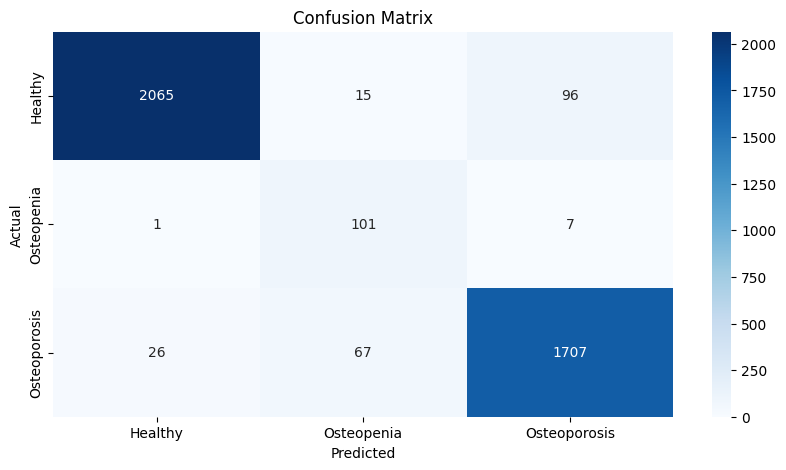

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the class labels
class_labels = ['Healthy', 'Osteopenia','Osteoporosis']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred2)

# Create a figure and plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

# Set tick labels and axis labels
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set the title
plt.title("Confusion Matrix")

# Show the plot
plt.show()

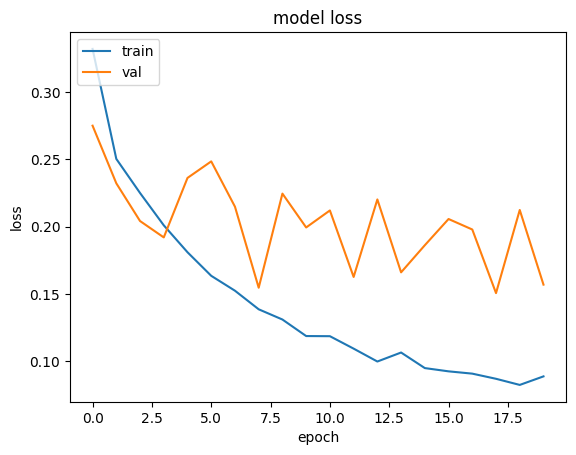

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

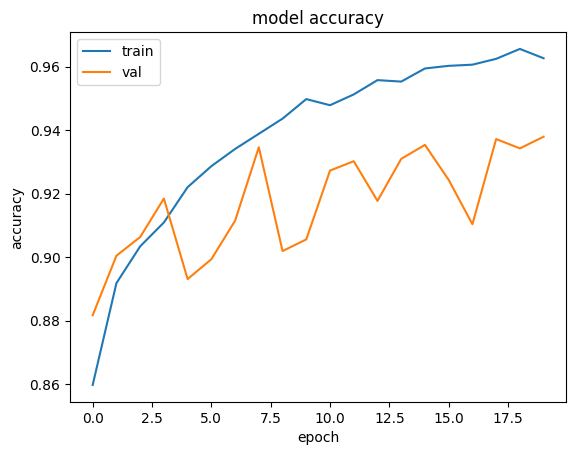

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()